In [1]:
import dill
import math
import numpy as np
from pprint import pprint
from bayes_opt import BayesianOptimization
from datetime import datetime as dt

CURRENT_YEAR = 2023
MAX_YEAR = 2123
years = list(range(CURRENT_YEAR, MAX_YEAR))
delays = {}

exec(open('utils.py').read())
print('Loaded')

Loaded


## Algorithms/insights delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 5         | -0.1418   | 6.685     | 6.522     | 6.026     |
| 6         | -0.1353   | 4.17      | 5.151     | 5.397     |
| 7         | -0.1055   | 0.9181    | 2.998     | 7.053     |
| 11        | -0.06553  | 0.0866    | 8.75      | 1.367     |
| 33        | -0.05861  | 0.8261    | 8.441     | 0.6699    |
| 47        | -0.03705  | 0.1379    | 8.279     | 0.89      |
| 61        | -0.0352   | 0.1642    | 9.635     | 0.918     |
Curve params found
{'push': 0.16421644563981555,
 'shift': 9.635139191782235,
 'slope': 0.9180212433926452}
-
## Chance of nonscaling delay ##


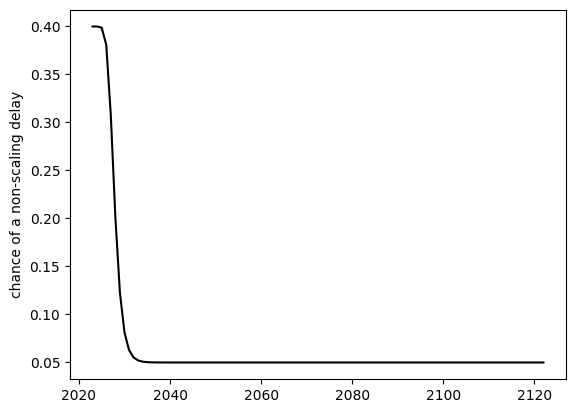

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 38%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 31%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 12%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 8%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 6%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 6%
Year: 2033 - 

In [2]:
nonscaling_points = [(2023, 0.4),
                     (2027, 0.3),
                     (2030, 0.2),
                     (2035, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['algorithms'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(2, 5)], [0.1, sq.lognorm(2, 20)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['algorithms']['length'] @ 1000, digits=0))

## Infrastructure delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.2842   | 3.523     | 5.725     | 7.987     |
| 4         | -0.2454   | 2.114     | 6.941     | 6.946     |
| 5         | -0.2056   | 0.8379    | 3.563     | 5.148     |
| 7         | -0.1764   | 0.3187    | 3.707     | 6.595     |
| 23        | -0.1461   | 0.7382    | 9.386     | 1.992     |
| 42        | -0.1335   | 0.02758   | 9.496     | 3.612     |
| 44        | -0.07785  | 0.01      | 7.844     | 2.781     |
| 70        | -0.07377  | 0.01      | 6.123     | 2.722     |
| 93        | -0.06047  | 0.01      | 4.168     | 2.681     |
| 113       | -0.04991  | 0.01766   | 4.627     | 2.732     |
Curve params found
{'push': 0.017663131170346968,
 'shift': 4.626800209536706,
 'slope': 2.731506358263473}
-
## Chance of nonscaling delay ##


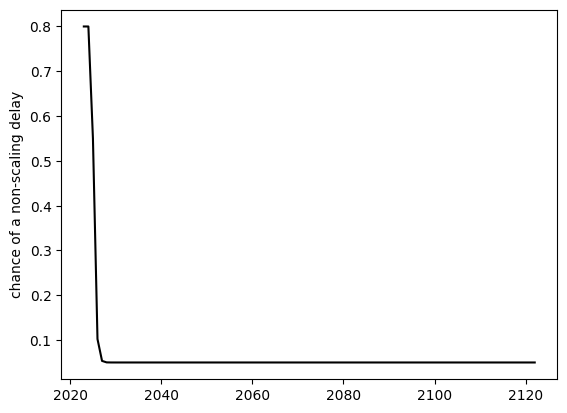

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 80%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 80%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 55%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2033 - cha

In [3]:
# https://twitter.com/ohlennart/status/1645058017119854592
# https://asteriskmag.com/issues/03/the-transistor-cliff
nonscaling_points = [(2023, 0.8),
                     (2025, 0.6),
                     (2030, 0.2),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['infra'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(1, 10)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['infra']['length'] @ 1000, digits=0))

## Data delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.3      | 8.191     | 3.192     | 3.594     |
| 4         | -0.2974   | 7.095     | 6.487     | 1.951     |
| 10        | -0.2422   | 2.662     | 3.709     | 0.01116   |
| 16        | -0.233    | 0.5997    | 7.471     | 1.491     |
| 42        | -0.2143   | 0.1877    | 8.145     | 1.954     |
| 43        | -0.0498   | 0.01      | 9.227     | 1.686     |
| 45        | -0.04667  | 0.0189    | 9.443     | 1.52      |
| 52        | -0.03005  | 0.02287   | 9.637     | 1.265     |
| 55        | -0.0156   | 0.2009    | 9.953     | 0.8391    |
Curve params found
{'push': 0.20090689594643638,
 'shift': 9.952639042884739,
 'slope': 0.8390626939564055}
-
## Chance of nonscaling delay ##


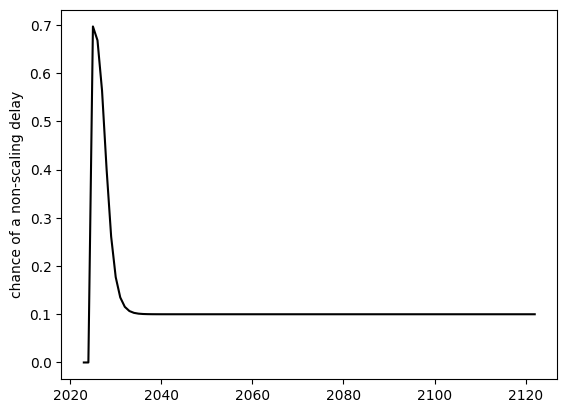

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 0%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 0%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 67%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 56%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 40%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 26%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 18%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 13%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 12%
Year: 2033 -

In [4]:
nonscaling_points = {'points': [(2025, 0.7),
                                (2027, 0.6),
                                (2030, 0.2),
                                (2050, 0.1)],
                     'init': 2024}
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['data'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(1, 8)], [0.1, sq.lognorm(3, 10)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['data']['length'] @ 1000, digits=0))

## Robotics need delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.07299  | 1.982     | 6.262     | 4.981     |
| 5         | -0.05032  | 0.4145    | 7.889     | 3.74      |
| 20        | -0.05     | 0.06868   | 5.026     | 5.439     |
| 39        | -0.0429   | 0.7994    | 2.295     | 0.2694    |
Curve params found
{'push': 0.7993634449727679,
 'shift': 2.294870344432417,
 'slope': 0.26938872928921653}
-
## Chance of nonscaling delay ##


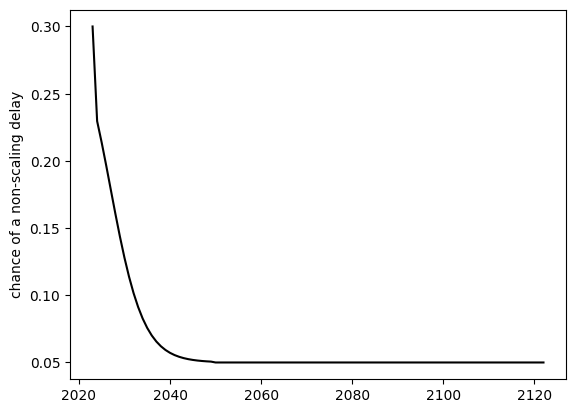

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 23%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 21%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 18%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 16%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 14%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 13%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 11%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2033

In [5]:
nonscaling_points = [(2023, 0.3),
                     (2030, 0.2),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['robotics'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.85, sq.lognorm(3, 10)],
                                                                        [0.15, sq.lognorm(7, 15)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['robotics']['length'] @ 1000, digits=0))

## Integration delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.09039  | 2.358     | 1.799     | 2.377     |
| 3         | -0.08682  | 3.44      | 5.171     | 1.396     |
| 6         | -0.07334  | 1.753     | 4.619     | 8.431     |
| 12        | -0.0616   | 0.9117    | 3.643     | 8.568     |
| 31        | -0.05126  | 0.5139    | 6.437     | 1.95      |
| 35        | -0.04547  | 0.531     | 8.7       | 0.7396    |
| 43        | -0.03939  | 0.8509    | 7.541     | 0.4738    |
| 46        | -0.03501  | 0.7312    | 7.63      | 0.4706    |
| 61        | -0.03147  | 0.01      | 9.512     | 1.129     |
Curve params found
{'push': 0.01, 'shift': 9.511734580787946, 'slope': 1.1287473953464584}
-
## Chance of nonscaling delay ##


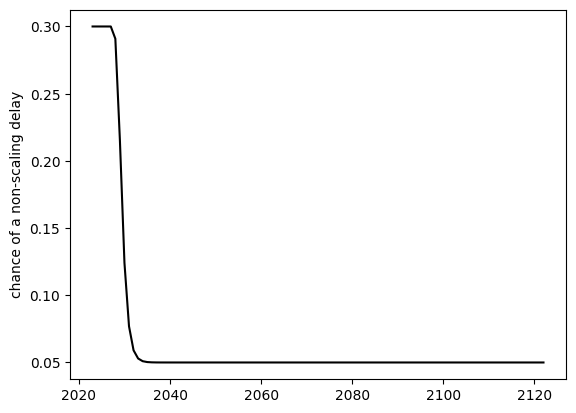

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 29%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 22%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 12%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 8%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 6%
Year: 2033 -

In [6]:
# https://twitter.com/MatthewJBar/status/1653461856919654400
nonscaling_points = [(2023, 0.3),
                     (2030, 0.2),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['integration'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(3, 30)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['integration']['length'] @ 1000, digits=0))

##  Real world feedback delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.02792  | 4.071     | 4.039     | 1.918     |
| 3         | -0.02454  | 3.878     | 9.495     | 9.599     |
| 4         | -0.01003  | 0.1255    | 1.367     | 2.005     |
| 41        | -0.009026 | 0.01      | 3.589     | 1.311     |
Curve params found
{'push': 0.01, 'shift': 3.5886090032892968, 'slope': 1.3105389464368666}
-
## Chance of nonscaling delay ##


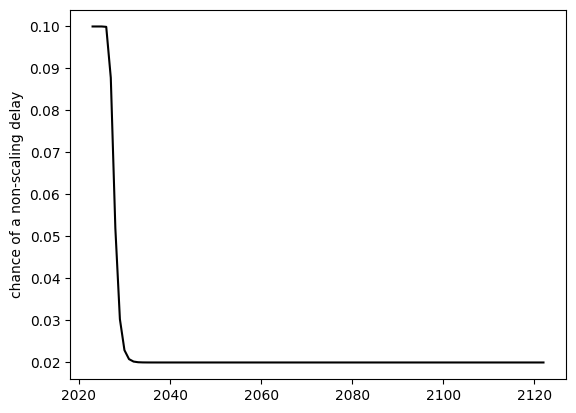

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 9%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 3%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 2%
Year: 2033 - cha

In [7]:
nonscaling_points = [(2023, 0.1),
                     (2030, 0.05),
                     (2050, 0.02)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['real_world_feedback'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.8, sq.lognorm(3, 10)],
                                                                                   [0.1, sq.lognorm(10, 30)],
                                                                                   [0.1, sq.lognorm(20, 50)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['real_world_feedback']['length'] @ 1000, digits=0))

## Policy delay (e.g., pause)

In [8]:
"""
nonscaling_points = [(2023, 0.3),
                     (2030, 0.2),
                     (2050, 0.2),
                     (2080, 0.2)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['policy_pause'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(1, 5)],
                                                                            [0.1, sq.lognorm(10, 100)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['policy_pause']['length'] @ 1000, digits=0))
"""

"\nnonscaling_points = [(2023, 0.3),\n                     (2030, 0.2),\n                     (2050, 0.2),\n                     (2080, 0.2)]\np_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)\ndelays['policy_pause'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(1, 5)],\n                                                                            [0.1, sq.lognorm(10, 100)]])}\nplot_nonscaling_delay(plt, years, p_nonscaling_delay)\nprint('-')\npprint(sq.get_percentiles(delays['policy_pause']['length'] @ 1000, digits=0))\n"

## Take off speeds

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 5         | -0.1912   | 4.862     | 8.492     | 8.618     |
| 14        | -0.03963  | 0.1786    | 4.269     | 0.4613    |
Curve params found
{'push': 0.1786193836084063,
 'shift': 4.269368937053436,
 'slope': 0.4612735268187041}
-
## Chance of nonscaling delay ##


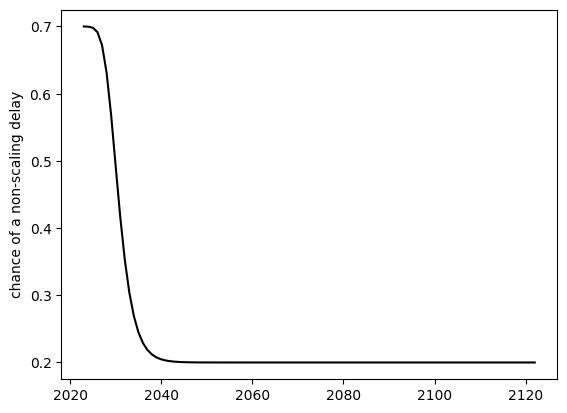

Year: 2023 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2024 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 70%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 69%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 67%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 63%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 57%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 49%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 42%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 35%
Year: 2033

In [9]:
# https://www.lesswrong.com/posts/Gc9FGtdXhK9sCSEYu/what-a-compute-centric-framework-says-about-ai-takeoff
nonscaling_points = [(2023, 0.7),
                     (2030, 0.5),
                     (2050, 0.35),
                     (2080, 0.2)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['take_off'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(2, 15)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['take_off']['length'] @ 1000, digits=0))

## Save

In [10]:
with open('caches/nonscaling_delays.dill', 'wb') as f:
    dill.dump(delays, f)
    
print('cached!')

cached!


In [11]:
print('File last ran: {}'.format(dt.now()))

File last ran: 2023-10-29 20:44:14.372402
